Missing values:
 customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   Phon

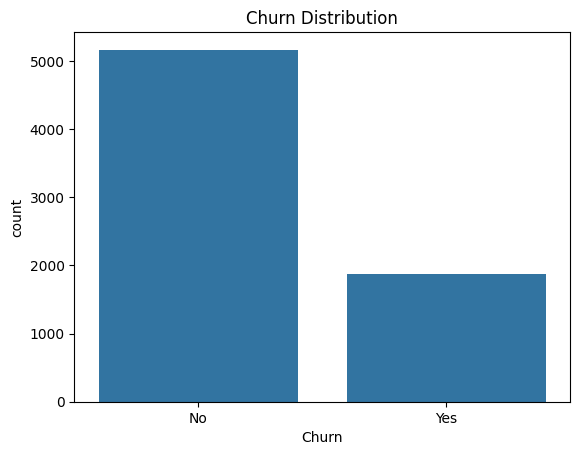

In [22]:
# 01_EDA.ipynb

# 📦 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
# from ydata_profiling import ProfileReport

# 📥 Load Data
df = pd.read_csv("../datasets/Telco-Customer-Churn.csv")
# 🧹 Basic Cleaning
# Remove spaces in column names
df.columns = df.columns.str.replace(' ', '')

# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Impute or drop missing values
df = df.dropna()
# 🧠 Basic Info
print(df.info())
print(df.describe())

# 🔍 Class Balance
print("Churn distribution:\n", df['Churn'].value_counts(normalize=True))
sns.countplot(data=df, x='Churn')
plt.title("Churn Distribution")
plt.show()

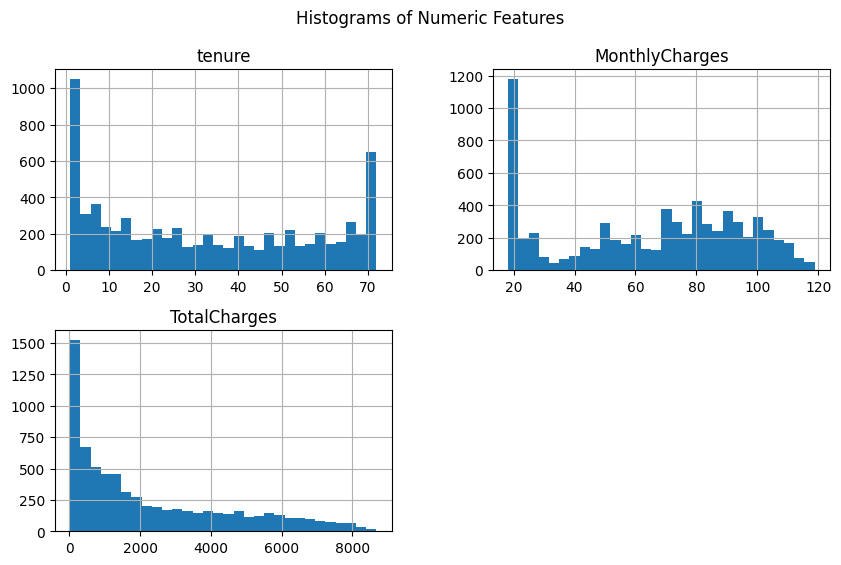

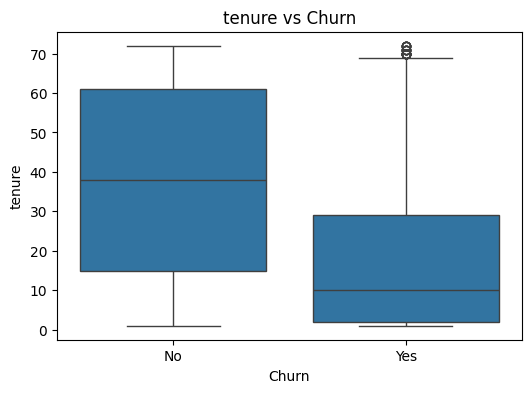

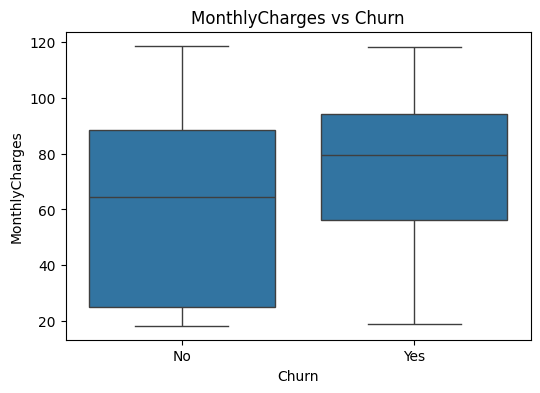

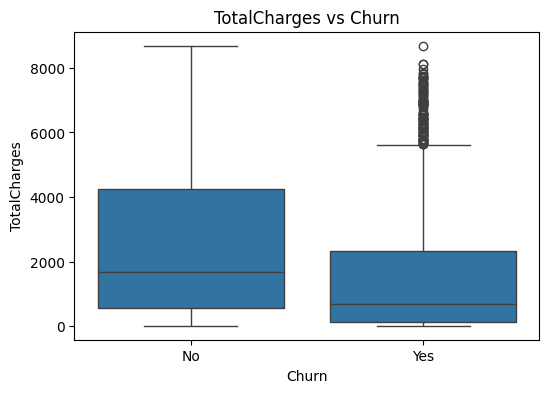

In [23]:
# 📊 Numeric Feature Distributions
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[num_cols].hist(bins=30, figsize=(10, 6))
plt.suptitle("Histograms of Numeric Features")
plt.show()

# 📉 Boxplots
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='Churn', y=col)
    plt.title(f"{col} vs Churn")
    plt.show()

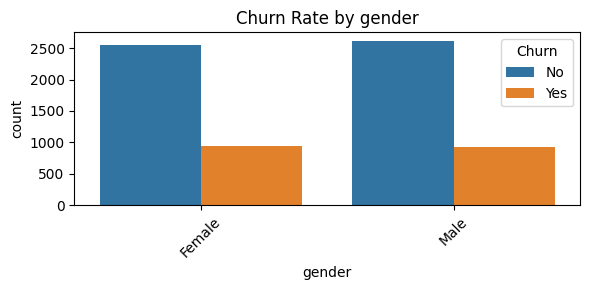

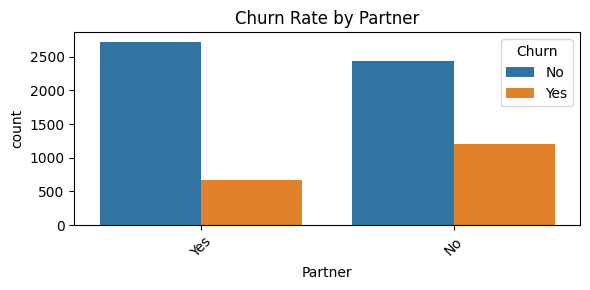

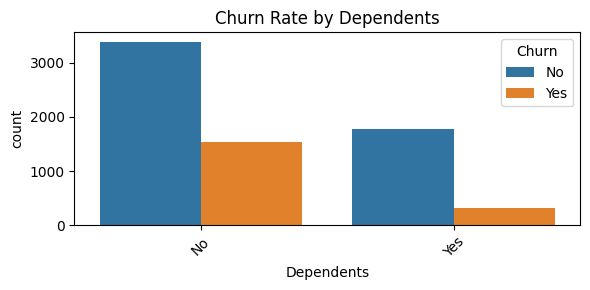

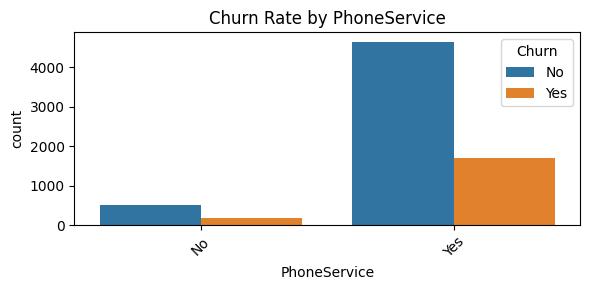

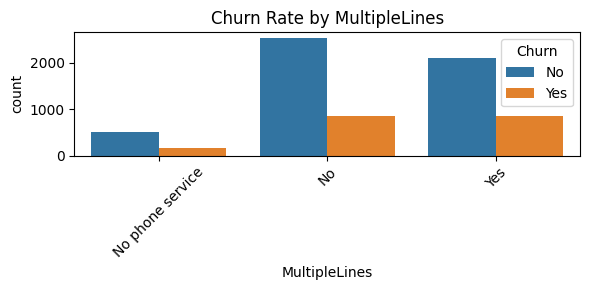

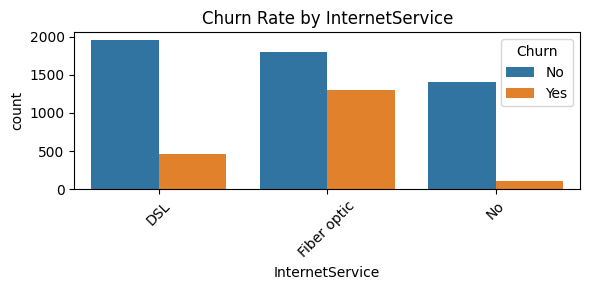

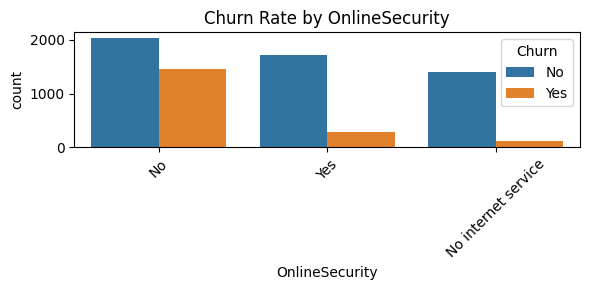

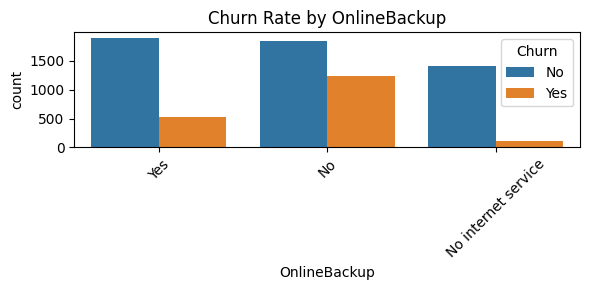

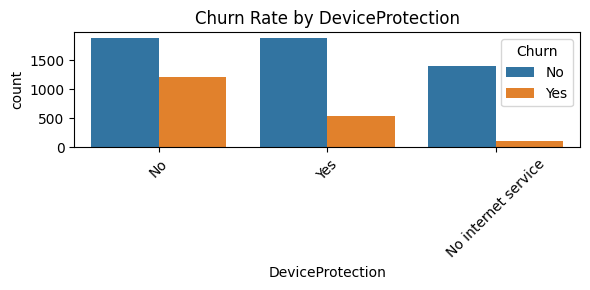

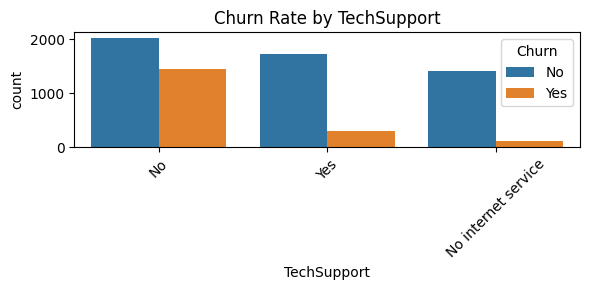

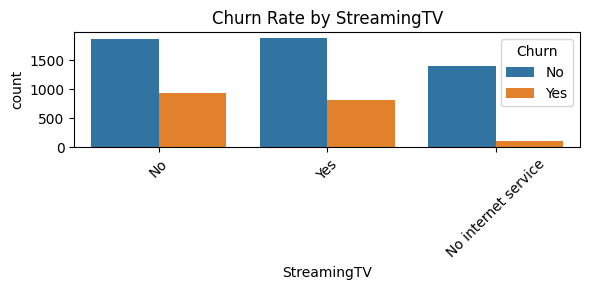

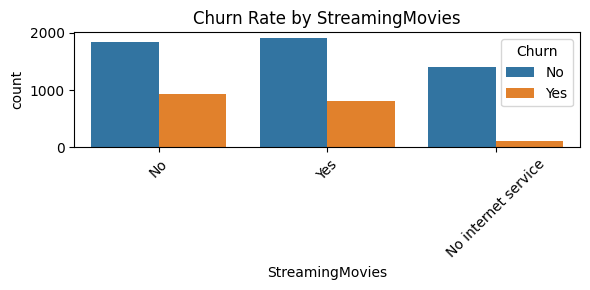

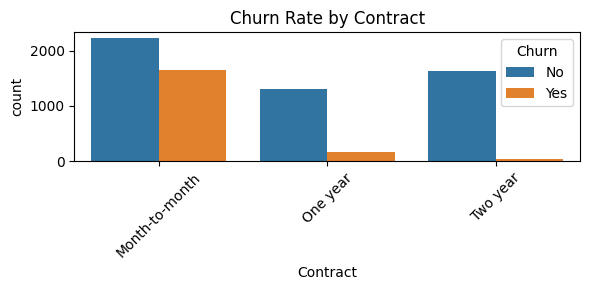

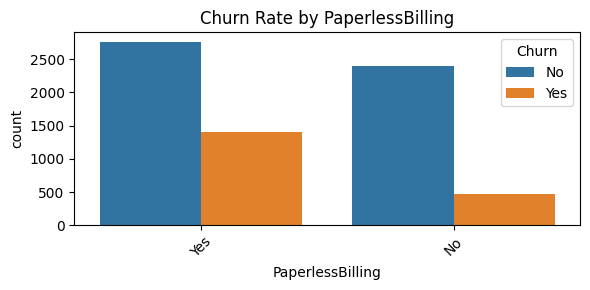

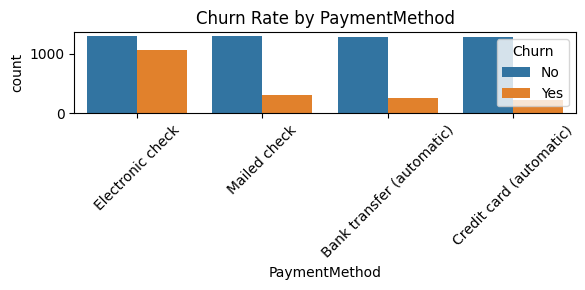

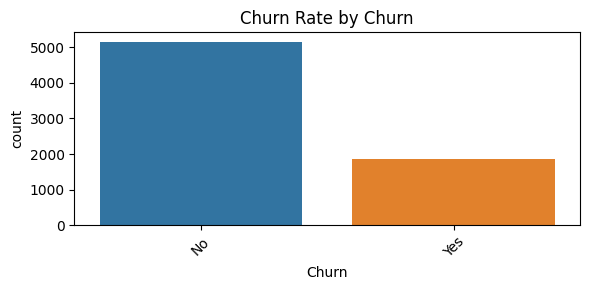

In [24]:
# 🔗 Categorical Features
cat_cols = df.select_dtypes(include=['object']).columns.drop('customerID')
for col in cat_cols:
    plt.figure(figsize=(6, 3))
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f"Churn Rate by {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

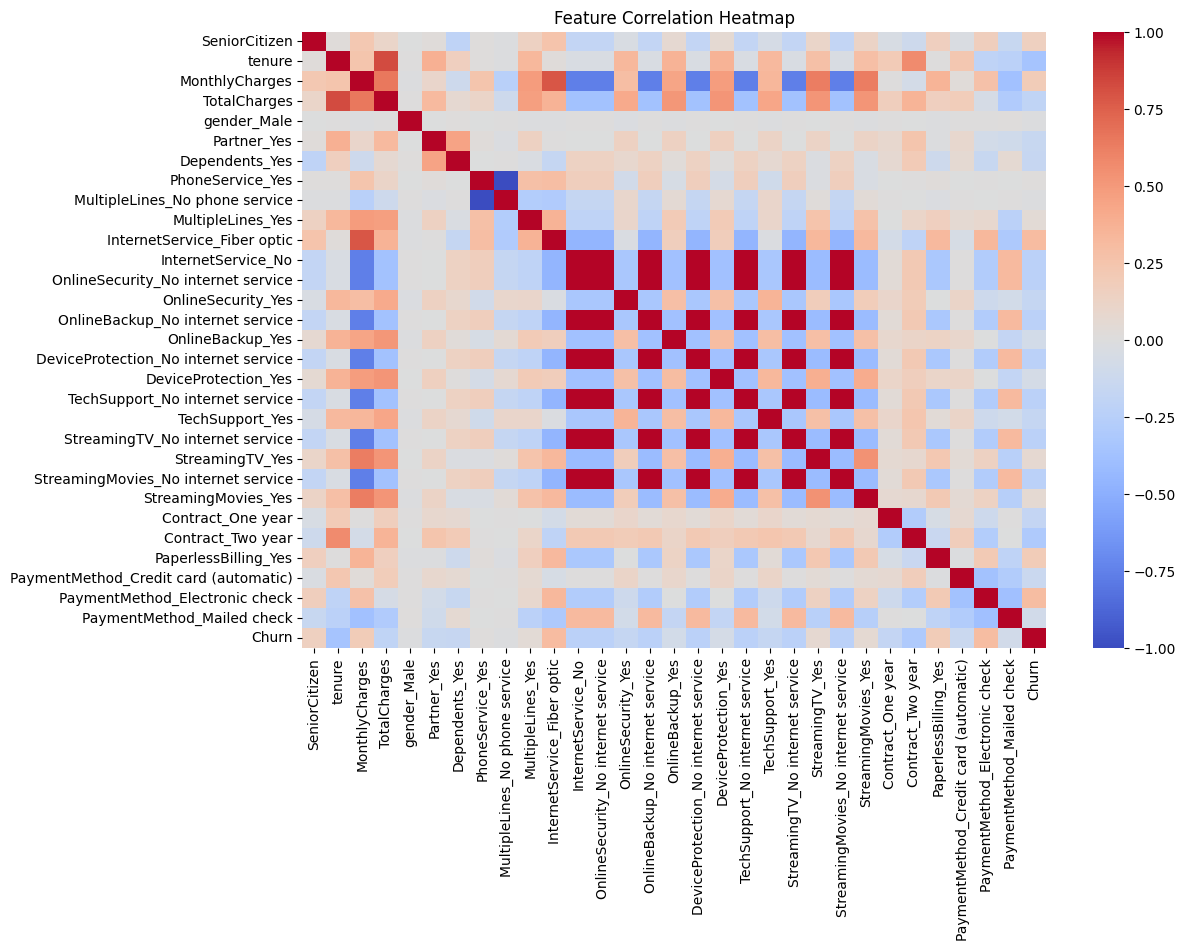

In [25]:
# 🔥 Correlation
df_encoded = pd.get_dummies(df.drop(columns=['customerID', 'Churn']), drop_first=True)
df_encoded['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# 📋 Profile Report (Optional)
# profile = ProfileReport(df, title="Telco Churn Report", explorative=True)
# profile.to_file("../outputs/telco_churn_eda_report.html")

In [26]:
# 🧹 Data Cleaning
df.replace(" ", np.nan, inplace=True)
df.dropna(inplace=True)

# 🔄 Convert TotalCharges to numeric
df['TotalCharges'] = df['TotalCharges'].astype(float)

# 🎯 Encode target
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# 🛠️ Drop customerID (not predictive)
df.drop('customerID', axis=1, inplace=True)

# 🔁 Encode categorical variables
cat_cols = df.select_dtypes(include='object').columns
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# 💾 Save cleaned data
# overwrite existing file
if os.path.exists("../datasets/cleaned_telco_data.csv"):
    os.remove("../datasets/cleaned_telco_data.csv")
    print("✅ Existing cleaned data file removed.")

else:
    print("✅ No existing cleaned data file found, proceeding to save new file.")

df_encoded.to_csv("../datasets/cleaned_telco_data.csv", index=False)
print("✅ Cleaned data saved to ../datasets/cleaned_telco_data.csv")


✅ No existing cleaned data file found, proceeding to save new file.
✅ Cleaned data saved to ../datasets/cleaned_telco_data.csv
